In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv(r"C:\Users\laksh\Downloads\archive (6)\diabetes_prediction_dataset.csv")
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (100000, 9)
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [4]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [5]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [6]:
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

In [7]:
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVC": SVC(kernel="linear", probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


In [36]:
results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec= precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print('accuracy:',accuracy_score(y_test, y_pred))
    print('precision:', precision_score(y_test, y_pred))
    print('recall:', recall_score(y_test, y_pred))
    print('f1:', f1_score(y_test, y_pred))

    #results = pd.concat([results,pd.DataFrame([{ 
     #   "Model": name,
      #  "Accuracy": round(acc * 100, 2),
       # "Precision": round(prec * 100, 2),
        #"Recall": round(rec * 100, 2),
        #"F1-Score":round(f1 * 100, 2) }])],ingore_index=True)

    
    #cm = confusion_matrix(y_test, y_pred)
    #plt.figure(figsize=(5,4))
    #sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    #plt.title(f"Confusion Matrix - {name}")
    #plt.xlabel("Predicted")
    #plt.ylabel("Actual")
    #plt.show()

# Step 10: Display results
print("\nPerformance Summary:\n")
print(results)



accuracy: 0.96025
precision: 0.8588421887390959
recall: 0.6370588235294118
f1: 0.7315096251266464
accuracy: 0.96105
precision: 0.9043020193151887
recall: 0.6058823529411764
f1: 0.7256076083127861
accuracy: 0.97
precision: 0.9428341384863124
recall: 0.6888235294117647
f1: 0.7960571040108769
accuracy: 0.9616
precision: 0.8819672131147541
recall: 0.6329411764705882
f1: 0.736986301369863
accuracy: 0.9723
precision: 0.9782971619365609
recall: 0.6894117647058824
f1: 0.8088336783988958

Performance Summary:

Empty DataFrame
Columns: [Model, Accuracy, Precision, Recall, F1-Score]
Index: []



Logistic Regression
Accuracy: 0.96025
Precision: 0.8588421887390959
Recall: 0.6370588235294118
F1: 0.7315096251266464


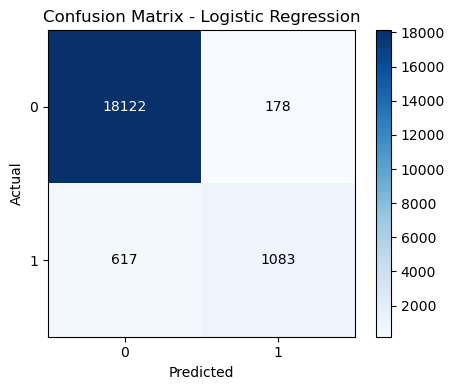


Linear SVC
Accuracy: 0.96105
Precision: 0.9043020193151887
Recall: 0.6058823529411764
F1: 0.7256076083127861


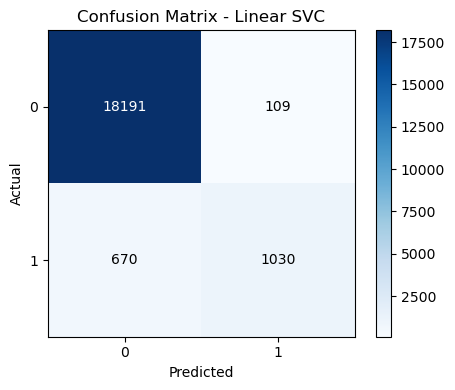


Random Forest
Accuracy: 0.97
Precision: 0.9428341384863124
Recall: 0.6888235294117647
F1: 0.7960571040108769


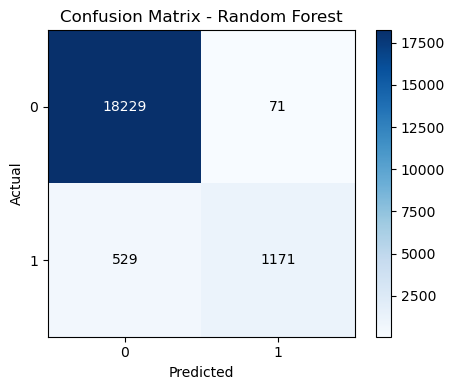


KNN
Accuracy: 0.9616
Precision: 0.8819672131147541
Recall: 0.6329411764705882
F1: 0.736986301369863


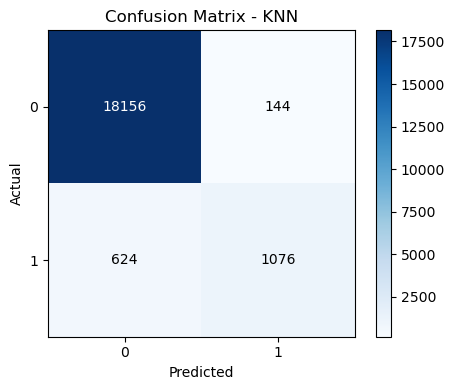


Gradient Boosting
Accuracy: 0.9723
Precision: 0.9782971619365609
Recall: 0.6894117647058824
F1: 0.8088336783988958


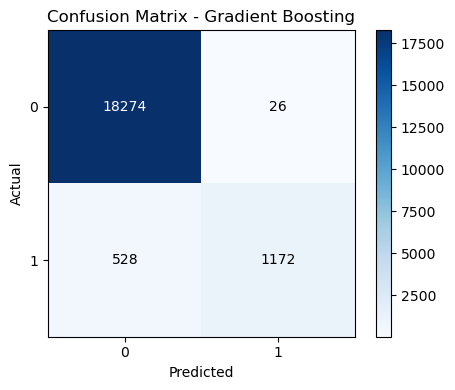

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1:", f1)

    
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix using matplotlib
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.colorbar()

    tick_marks = np.arange(len(set(y)))
    plt.xticks(tick_marks, set(y))
    plt.yticks(tick_marks, set(y))

    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()


In [38]:
import pickle

In [39]:
with open("diabetes_models.pkl", "wb") as f:
    pickle.dump(models, f)
with open("diabetes_models.pkl", "rb") as f:
    loaded_models = pickle.load(f)
y_pred = loaded_models["Random Forest"].predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.97


In [41]:
import pickle
from sklearn.metrics import confusion_matrix

all_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)

    all_results[name] = {
        "model": model,                # trained model
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1_score": f1,
        "confusion_matrix": cm
    }

# Save everything into one pickle file
with open("diabetes_results.pkl", "wb") as f:
    pickle.dump(all_results, f)